<a href="https://colab.research.google.com/github/michaelwnau/ai_academy_notebooks/blob/main/spotify_exploratory_analysis_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Template: Phase 1

Below are some concrete steps that you can take while doing your analysis. This guide isn't "one size fit all" so you will probably not do everything listed. But it still serves as a good "pipeline" for how to do data analysis.

If you do engage in a step, you should clearly mention it in the notebook.

---


## Loading Data

1. Load up your data
2. Decide what you want to predict

### Refresher on Data Types

* Scalar (no transformation needed)
    * Numeric
    * Discrete
        * Ordinal
        * Binary
* Text
    * Bag of Words, TF-IDF, Embeddings
* Sets (e.g. tags)
    * Can't do simple bag of words, since tags can be multi word
    * One hot encoding
* Time series
    * Naive approaches
        * Last value
        * Average, Median
        * Max/min
* Numeric Data that isn't directly interpretable (e.g. geospatial data)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [5]:
# Load data
playlists = pd.read_csv('/content/drive/MyDrive/AI ACADEMY/2 - Data Mining/8- Week 8/WKS8_Student/archive/playlists.csv')
genres = pd.read_csv('/content/drive/MyDrive/AI ACADEMY/2 - Data Mining/8- Week 8/WKS8_Student/archive/genres_v2.csv')

# Recon the data
print(playlists.head())
print(genres.head())


                 Playlist      Genre
0  19WuHd4MxWLzE1fpMmw4S4  Dark Trap
1  6XyR8uzgkSoDzHuOxxRtLH  Dark Trap
2  37Ij3ofyhvEhFEH8YZMZ2X  Dark Trap
3  07zTlfPpsxeoWdumbkNWMI  Dark Trap
4  2dClSRLsnptdkDQnpi5H2f  Dark Trap
   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...

<ipython-input-5-bc97dc9d5ac5>:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  genres = pd.read_csv('/content/drive/MyDrive/AI ACADEMY/2 - Data Mining/8- Week 8/WKS8_Student/archive/genres_v2.csv')


In [6]:
# Check and handle missing values
playlists.isnull().sum()

# Fill numeric missing values with median or mean
playlists.fillna(playlists.median(), inplace=True)


<ipython-input-6-cb1a85c97022>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  playlists.fillna(playlists.median(), inplace=True)


In [7]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the 'Playlist' data
X = vectorizer.fit_transform(playlists['Playlist'])

# Convert to dataframe
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(playlists.columns)


Index(['Playlist', 'Genre'], dtype='object')


In [8]:
# Create a OneHotEncoder instance
encoder = OneHotEncoder()

# Fit and transform the Genre data
X = encoder.fit_transform(playlists['Genre'].values.reshape(-1, 1))

# Convert to dataframe
X_df = pd.DataFrame(X.toarray(), columns=encoder.get_feature_names_out())


In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, playlists['Genre'], test_size=0.2, random_state=42)

# Create a RandomForestClassifier instance
clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   Dark Trap       1.00      1.00      1.00         1
         Emo       1.00      1.00      1.00         1
      Hiphop       1.00      1.00      1.00         1
         Pop       1.00      1.00      1.00         1
         RnB       1.00      1.00      1.00         3
  Trap Metal       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## Exploratory Data Analysis (EDA)

1. Decide if feature selection is needed.
    * Do you have hihgly correlated features?
2. Decide if you have non-scalar attributes.
3. What type of supervised learning is this?
    * Binary Classification
    * Multi-class classification?
    * Ordinal classification [Tricky]
        * Do you want to change this into regression or binarize into binary classification?
    * Regression
4. If doing classification
    1. Decide whether you class variable makes sense.
    2. Figure out what your class balance is
5. Histogram the features
    * Good if distribution is highly skewed
6. Vizualize using reduced dimensions
    * PCA, MVD
    * T-SNE

In [10]:
# check the first few rows of the dataset
print(playlists.head())

# check data types and missing values
print(playlists.info())

# Check data distribution
playlists.describe()


                 Playlist      Genre
0  19WuHd4MxWLzE1fpMmw4S4  Dark Trap
1  6XyR8uzgkSoDzHuOxxRtLH  Dark Trap
2  37Ij3ofyhvEhFEH8YZMZ2X  Dark Trap
3  07zTlfPpsxeoWdumbkNWMI  Dark Trap
4  2dClSRLsnptdkDQnpi5H2f  Dark Trap
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Playlist  39 non-null     object
 1   Genre     39 non-null     object
dtypes: object(2)
memory usage: 752.0+ bytes
None


,Playlist,Genre
count,39,39
unique,39,8
top,19WuHd4MxWLzE1fpMmw4S4,Emo
freq,1,9


<Axes: >

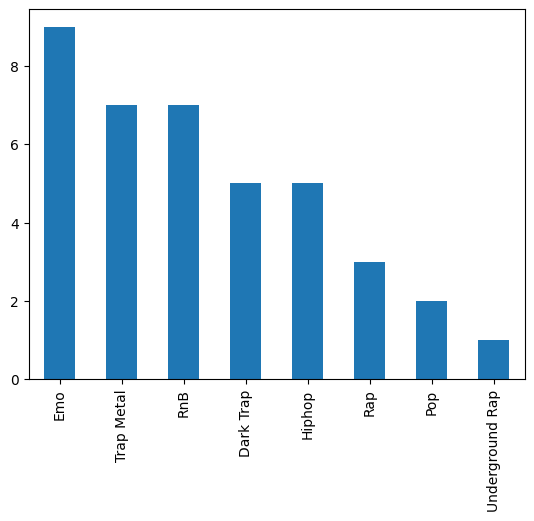

In [12]:
# check class distribution
playlists['Genre'].value_counts().plot(kind='bar')


In [14]:
# use t-SNE for visualization (convert your processed data to 2D)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
playlists_2d = tsne.fit_transform(playlists_processed)


NameError: ignored

<ipython-input-17-8eab516d0191>:8: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  genres = pd.read_csv('/content/drive/MyDrive/AI ACADEMY/2 - Data Mining/8- Week 8/WKS8_Student/archive/genres_v2.csv')


   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmR

<ipython-input-17-8eab516d0191>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(genres.corr(), annot=True, fmt=".2f")


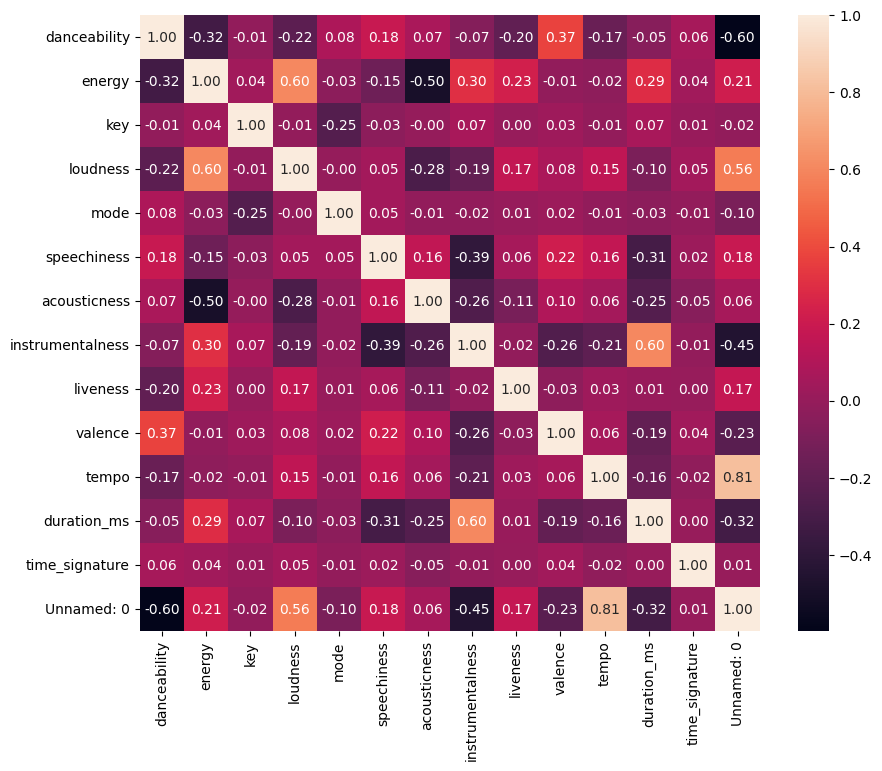

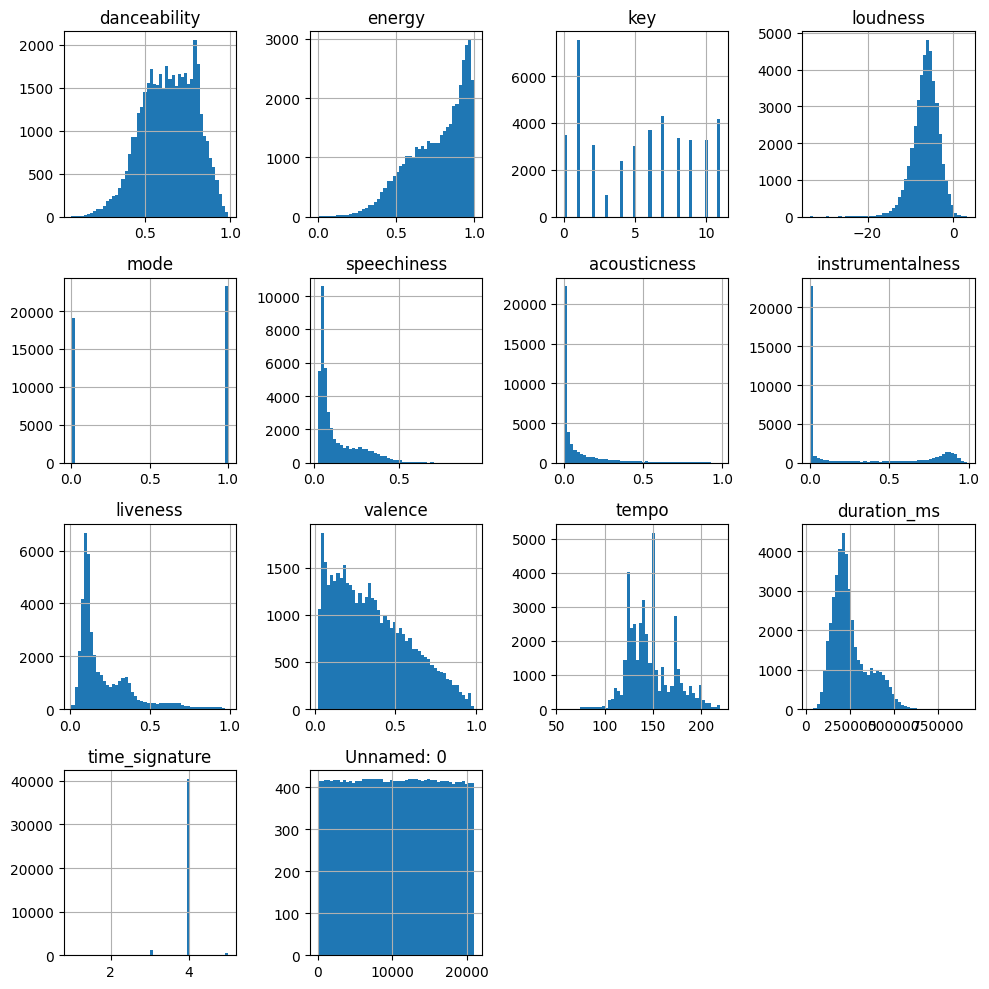

In [17]:
# The following cells use the `genres_v2.csv` file
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
genres = pd.read_csv('/content/drive/MyDrive/AI ACADEMY/2 - Data Mining/8- Week 8/WKS8_Student/archive/genres_v2.csv')

# Display the first few rows of the data
print(genres.head())

# Display a summary of the data
print(genres.info())

# Check the distribution of the genre
print(genres['genre'].value_counts())

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(genres.corr(), annot=True, fmt=".2f")
plt.show()

# Visualize the distribution of each feature
genres.hist(figsize=(10, 10), bins=50)
plt.tight_layout()
plt.show()


<ipython-input-20-886ac7b981fe>:6: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  genres = pd.read_csv('/content/drive/MyDrive/AI ACADEMY/2 - Data Mining/8- Week 8/WKS8_Student/archive/genres_v2.csv')


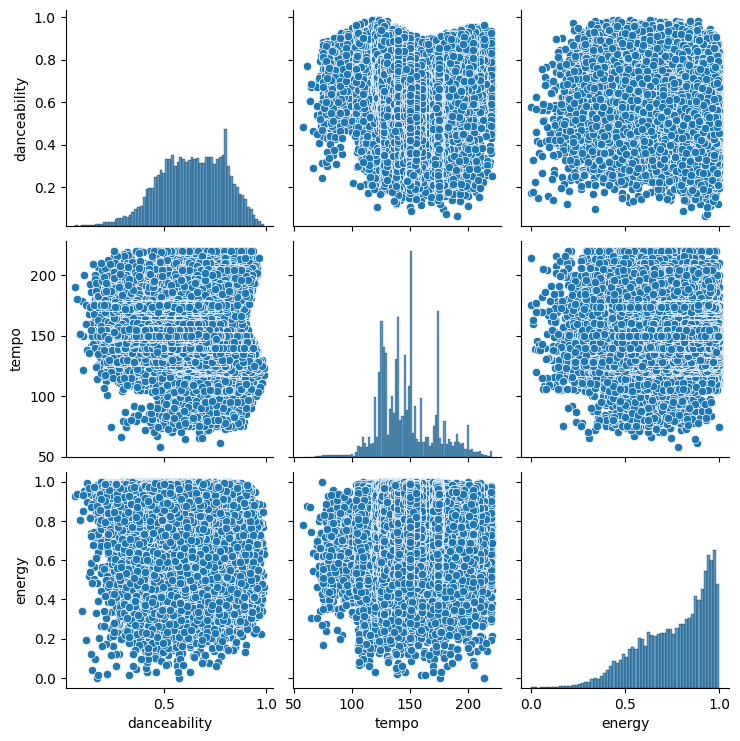

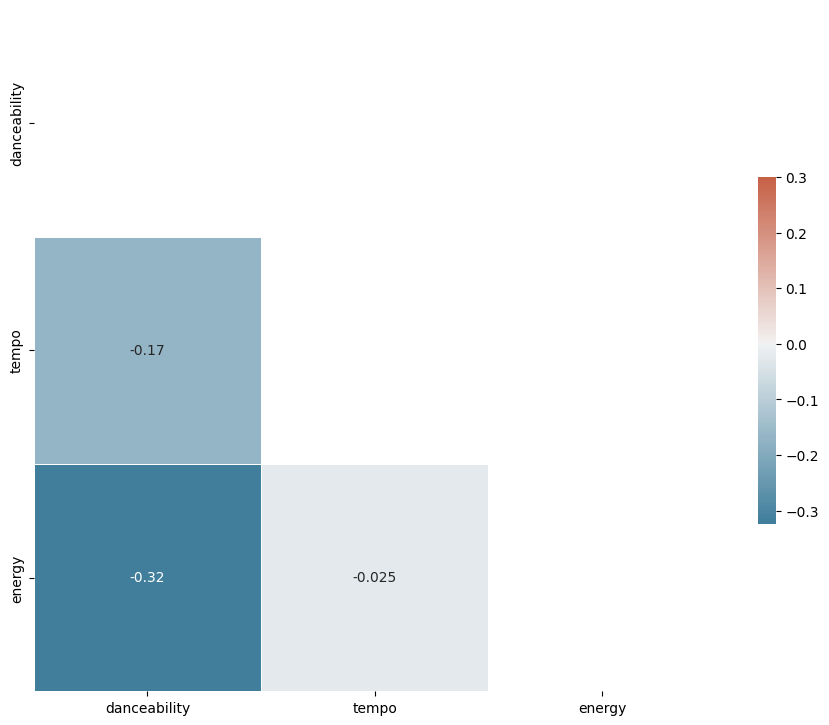

In [20]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
genres = pd.read_csv('/content/drive/MyDrive/AI ACADEMY/2 - Data Mining/8- Week 8/WKS8_Student/archive/genres_v2.csv')

# Pairplot for 'danceability', 'tempo', and 'energy'
sns.pairplot(genres[['danceability', 'tempo', 'energy']])
plt.show()

# Compute the correlation matrix
corr = genres[['danceability', 'tempo', 'energy']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()


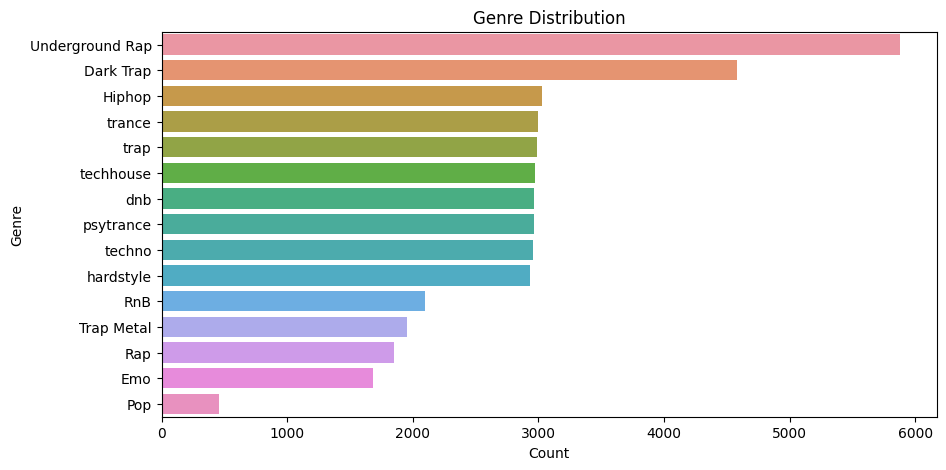

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(y='genre', data=genres, order = genres['genre'].value_counts().index)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


<ipython-input-24-0cbb1049eb50>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_grouped = genres.groupby('genre').mean()


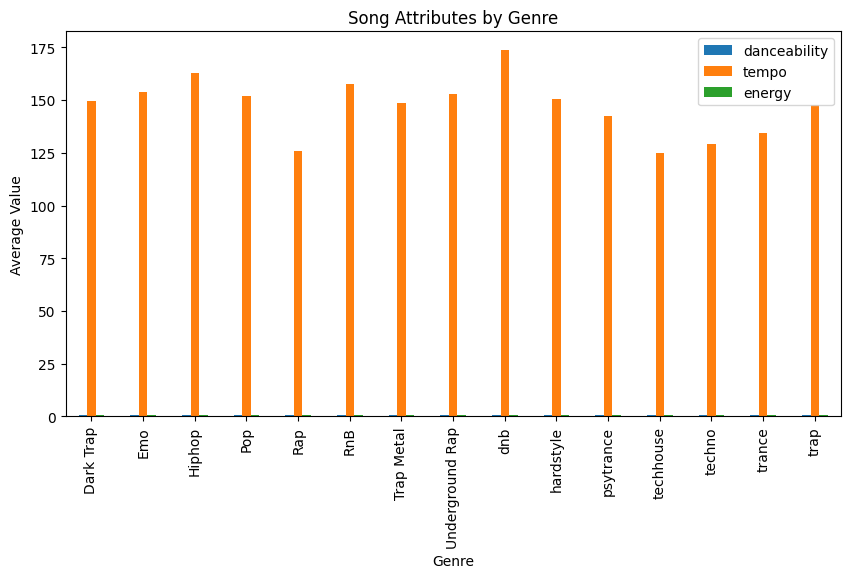

In [24]:
genre_grouped = genres.groupby('genre').mean()
genre_grouped[['danceability', 'tempo', 'energy']].plot(kind='bar', figsize=(10,5))
plt.title('Song Attributes by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Value')
plt.show()


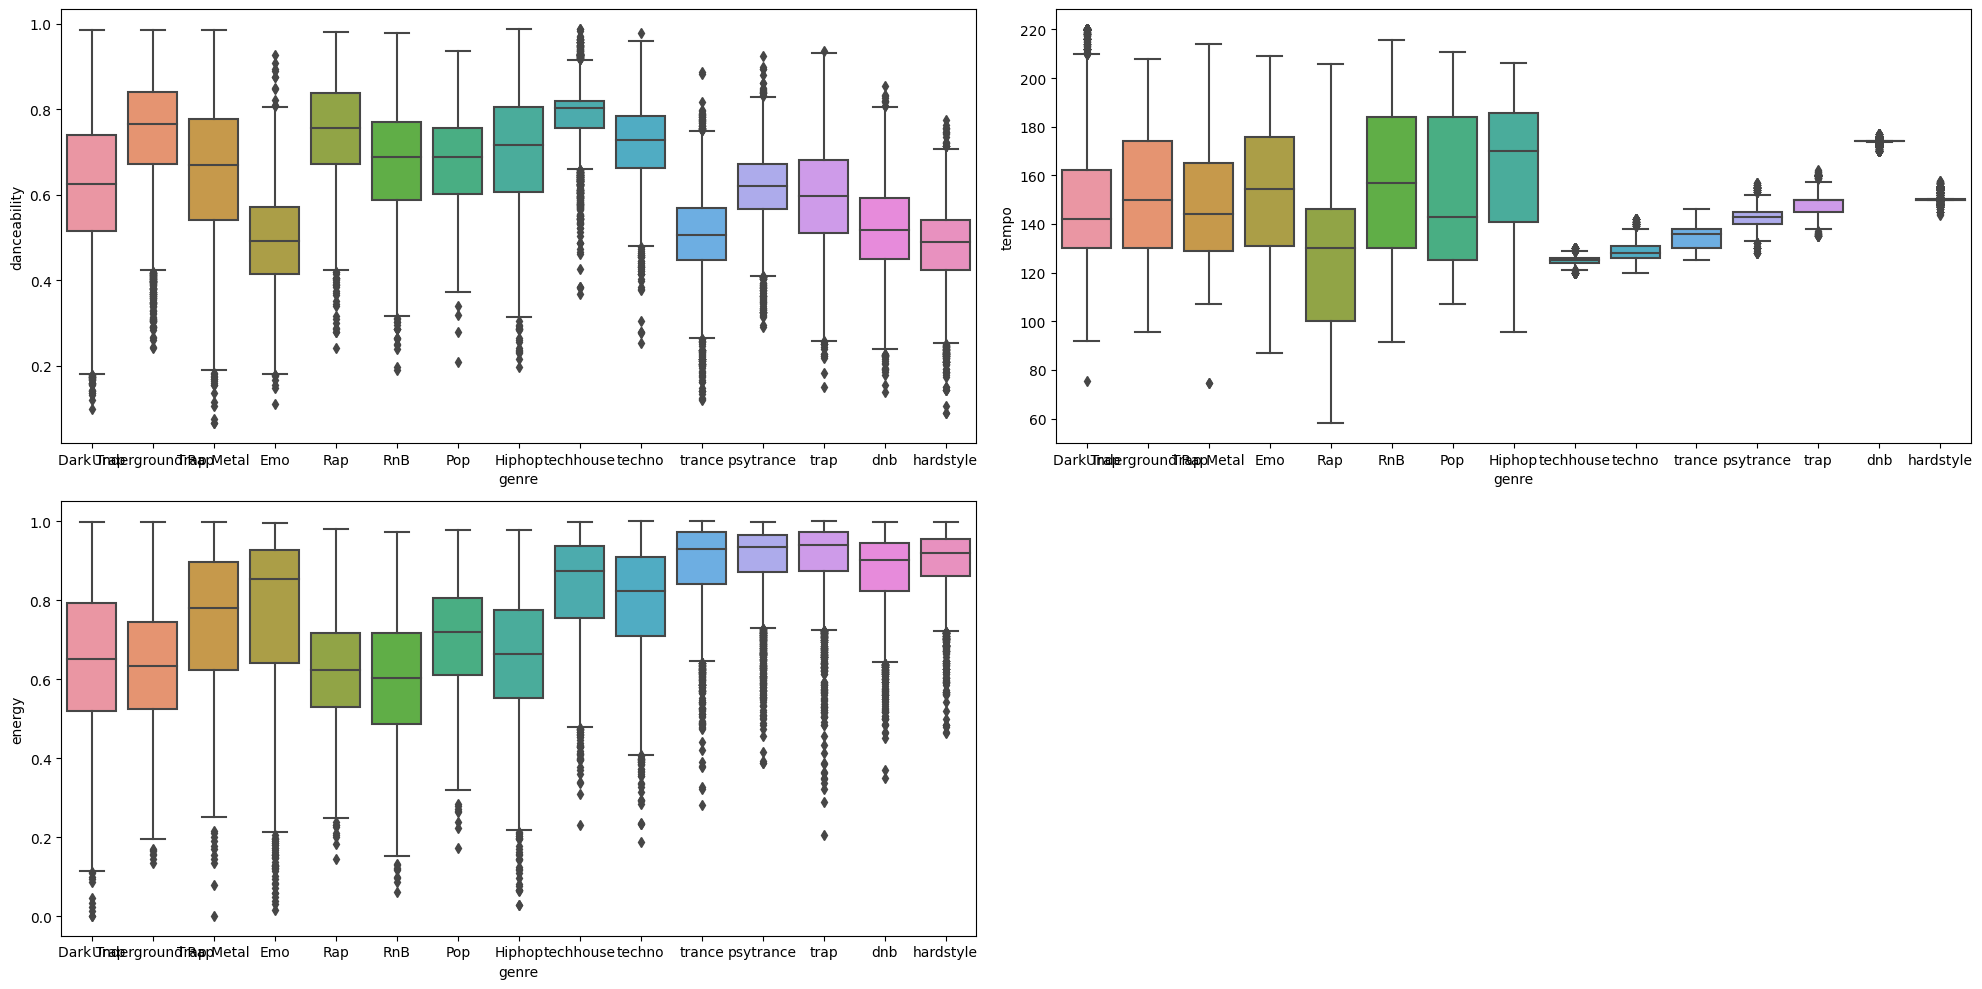

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'genre', y = 'danceability', data = genres)
plt.subplot(2,2,2)
sns.boxplot(x = 'genre', y = 'tempo', data = genres)
plt.subplot(2,2,3)
sns.boxplot(x = 'genre', y = 'energy', data = genres)
plt.tight_layout()
plt.show()


In [33]:
print(dark_trap.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')


<ipython-input-34-31c361be44a9>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = dark_trap.mean()


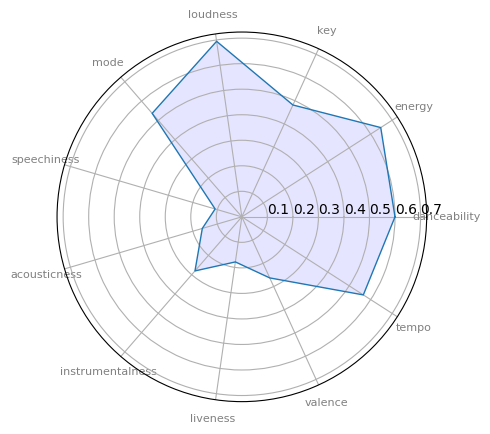

In [34]:
import matplotlib.pyplot as plt
from math import pi

# Filter to only Dark Trap genre
dark_trap = genres[genres['genre']=='Dark Trap']

# Calculate the means
means = dark_trap.mean()

# List of song attributes we are interested in
attributes = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a list of values for each attribute (normalized to 0-1 range)
values = [(means[attr] - min(genres[attr])) / (max(genres[attr]) - min(genres[attr])) for attr in attributes]

# Add the first value to the end of the list to complete the circular plot
values += values[:1]

# Number of variables
num_vars = len(attributes)

# Compute angle of each axis in the plot (divide the plot / number of variable)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], attributes, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

plt.show()


## Preprocessing

1. Remove meaningless features (e.g. IDs), or unfair features (e.g. percent grade should be removed if predicing final grade)
2. Discretization
3. Transform features into usable formats (standardize dates, vectorize words)
4. Transform data to a wide format (one row per prediction)
5. **Feature Selection**: Remove redundant, noisy features or unhelpful features
6. Feature creation
    * Use an external tool (e.g. analyzing sentiment from text)
7. Revist EDA using processed features